In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

from kernel.fun import KernelFun

%load_ext autoreload
%autoreload 2

In [2]:
dt = 0.5

td = 5

# support = np.arange(-2 * td, 16 * td, dt)
# ker = KernelFun(lambda t, td, A: A * (t + td) * np.exp(-(t + td) / td), basis_kwargs=dict(A=np.array([1])), 
#                 shared_kwargs=dict(td=10), support=support)

# support = np.arange(-5 * td, 5 * td,
#                     dt)
support = np.array([-5 * td, 5 * td])
ker = KernelFun.gaussian_delta(td, tm=0, support=support)
# ker = KernelFun.gaussian(td, support=support)
t_int = np.arange(-5 * td, 5 * td, dt)
ker_vals = ker.interpolate(t_int)

tm = 7 * td
ker_left = KernelFun.gaussian_delta(td, tm=-tm, support=support - tm)
ker_right = KernelFun.gaussian_delta(td, tm=tm, support=support + tm)

t = np.arange(0, 500, dt)
x = np.zeros((len(t), 1))
x[50:len(t) - 50, 0] = np.random.randn(len(t) - 100)

y = ker.convolve_continuous(t, x)
y_right = ker_right.convolve_continuous(t, x)
y_left = ker_left.convolve_continuous(t, x)

y2 = fftconvolve(ker_vals[:, None], x, mode='full', axes=0)
y3 = [np.sum(ker_vals[::-1][:u] * x[:u]) for u in range(len(t))]

In [3]:
ker_vals[0], ker_vals[-1]

(2.973439029468601e-07, 4.877921491786722e-07)

False
False


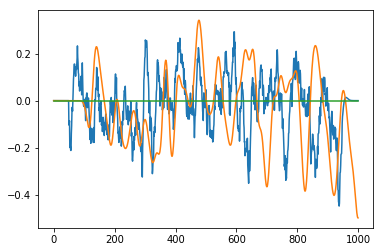

In [4]:
# plt.plot(x)
plt.plot(y)
plt.plot(y_right)
plt.plot(y_left)

print(np.allclose(y[:len(t) - int(tm / dt)], y_right[int(tm / dt):]))
print(np.allclose(y[int(tm / dt):], y_left[:len(t) - int(tm / dt)]))
# plt.plot(y3)
# plt.plot(y2)

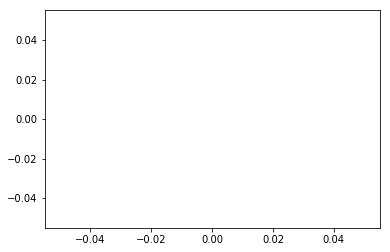

In [154]:
plt.plot(ker_vals)

In [160]:
dt = 0.5

td = 5

tm = 0
support = np.array([0, 16 * td])
ker = KernelFun(lambda t, tm, td, A: A * (t - tm) * np.exp(-(t - tm) / td), basis_kwargs=dict(A=np.array([1])), 
                shared_kwargs=dict(td=td, tm=tm), support=support)

t_int = np.arange(0, 16 * td, dt)
ker_vals = ker.interpolate(t_int)

tm = -10
ker_left = KernelFun(lambda t, tm, td, A: A * (t - tm) * np.exp(-(t - tm) / td), basis_kwargs=dict(A=np.array([1])), 
                shared_kwargs=dict(td=td, tm=tm), support=support + tm)
tm = 10
ker_right = KernelFun(lambda t, tm, td, A: A * (t - tm) * np.exp(-(t - tm) / td), basis_kwargs=dict(A=np.array([1])), 
                shared_kwargs=dict(td=td, tm=tm), support=support + tm)

t = np.arange(0, 500, dt)
x = np.zeros((len(t), 1))
x[50:len(t) - 50, 0] = np.random.randn(len(t) - 100)

y = ker.convolve_continuous(t, x)
y_right = ker_right.convolve_continuous(t, x)
y_left = ker_left.convolve_continuous(t, x)

True
True


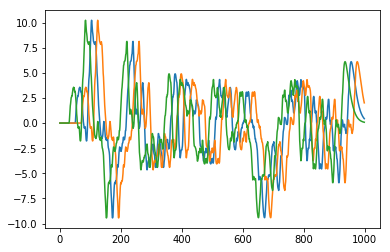

In [163]:
# plt.plot(x)
plt.plot(y)
plt.plot(y_right)
plt.plot(y_left)

print(np.allclose(y[:len(t) - int(tm / dt)], y_right[int(tm / dt):]))
print(np.allclose(y[int(tm / dt):], y_left[:len(t) - int(tm / dt)]))
# plt.plot(y3)
# plt.plot(y2)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


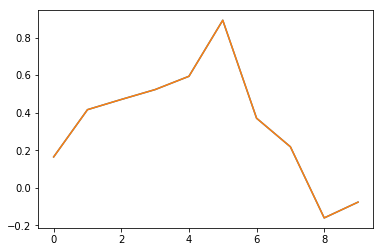

In [76]:
# np.random.seed(1)

dt = 0.2
td = 10

support = np.array([0, 10 * td])
ker = KernelFun.single_exponential(td, support=support)
t_int = np.arange(0, 10 * td, dt)
ker_vals = ker.interpolate(t_int)

t = np.arange(0, 500, dt)

for ii in range(200):
    x = np.random.randn(len(t), 1)
    y = ker.convolve_continuous(t, x)
#     y2 = np.array([np.sum(ker_vals[:min(u + 1, len(ker_vals))][::-1] * x[max(0, u + 1 - len(ker_vals)):min(u + 1, u + 1 + len(ker_vals)), 0]) for u in range(len(t))]) * dt
    y2 = np.array([np.sum(ker_vals[:min(u + 1, len(ker_vals))][::-1] * x[max(0, u + 1 - len(ker_vals)):u + 1, 0]) for u in range(len(t))]) * dt
    print(np.all((y[:, 0] - y2) < 5e-5))

plt.plot(y[:10])
plt.plot(y2[:10])
# plt.plot(y3)

In [61]:
y.shape, y2.shape

((2500, 1), (2499,))

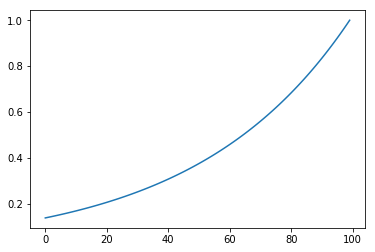

In [33]:
plt.plot(ker_vals[:100][::-1])

In [31]:
# y[0], ker_vals[0] * x[0] * dt, y2[0]
y[1], np.sum(ker_vals[:2][::-1] * x[:2]) / 10, y2[1], y3[1] * dt

(array([0.19608495]),
 0.20051272954211527,
 0.4010254590842306,
 array([0.19608495]))

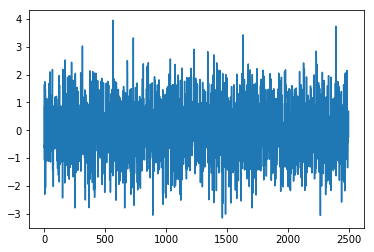

In [34]:
plt.plot(x)

In [214]:
x[:2]

array([[-0.77028929],
       [ 0.48868318]])